In [1]:
import json
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Load datasets
with open('data/author_data.json', 'r') as f:
    coauthorship_data = json.load(f)

with open('data/paper_data.json', 'r') as f:
    paper_data = json.load(f)

In [3]:
# Initialize dictionaries to store metrics
author_metrics = defaultdict(lambda: {'first_publication_year': None, 'total_citation_count': 0, 'total_downloads': 0, 'publication_count': 0, 'years_with_publications': []})

In [4]:
for paper_id, paper_info in paper_data.items():
    publication_year = int(paper_info['publication year'])
    citation_count = paper_info['metrics']['citationCount']
    total_downloads = paper_info['metrics']['totalDownloads']
    for author in paper_info['authors']:
        author_id = author['id']
        if author_metrics[author_id]['first_publication_year'] is None or publication_year < author_metrics[author_id]['first_publication_year']:
            author_metrics[author_id]['first_publication_year'] = publication_year
        author_metrics[author_id]['total_citation_count'] += citation_count
        author_metrics[author_id]['total_downloads'] += total_downloads
        author_metrics[author_id]['publication_count'] += 1
        author_metrics[author_id]['years_with_publications'].append(publication_year)

In [5]:
# Convert coauthorship data to DataFrame
authors_list = []
for author_id, author_info in coauthorship_data.items():
    metrics = author_metrics[author_id]
    avg_citation_count = metrics['total_citation_count'] / metrics['publication_count'] if metrics['publication_count'] > 0 else 0
    avg_downloads = metrics['total_downloads'] / metrics['publication_count'] if metrics['publication_count'] > 0 else 0
    coauthor_ids = [coauthor['id'] for coauthor in author_info['coAuthors']]
    authors_list.append({
        'author_id': author_id,
        'first_name': author_info['first name'],
        'last_name': author_info['last name'],
        'affiliations': author_info['affiliations'],
        'article_count': author_info['article count'],
        'first_publication_year': metrics['first_publication_year'],
        'avg_citation_count': avg_citation_count,
        'avg_downloads': avg_downloads,
        'coAuthors': coauthor_ids,
        'years_with_publications': metrics['years_with_publications']
    })

authors_df = pd.DataFrame(authors_list)

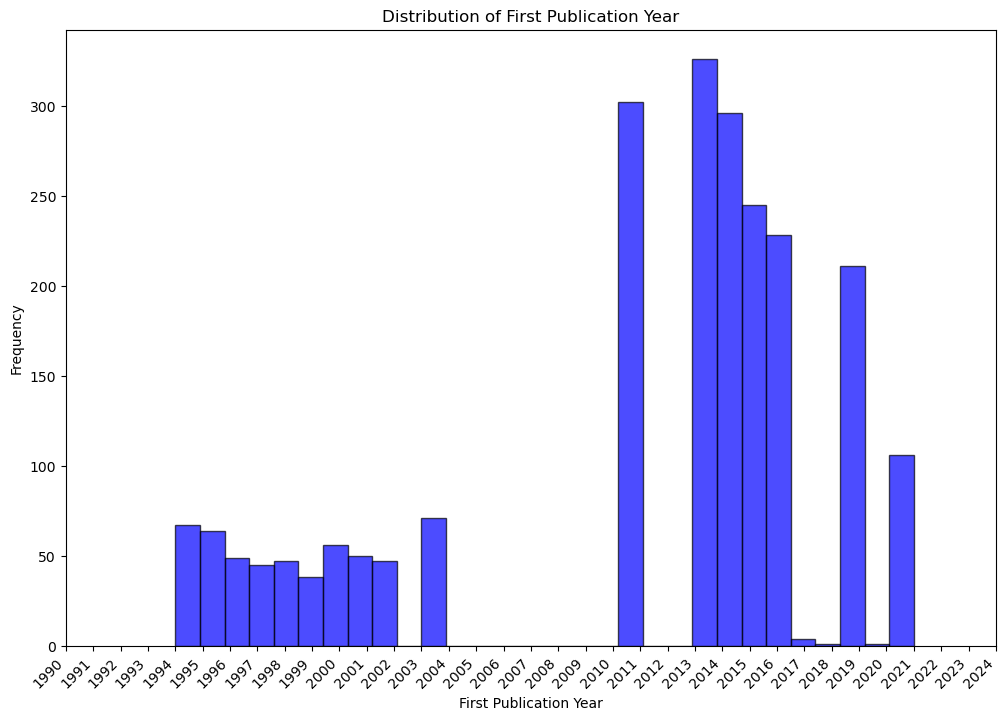

In [6]:
# Plot the distribution of first publication year with custom ticks
plt.figure(figsize=(12, 8))
plt.hist(authors_df['first_publication_year'].dropna(), bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('First Publication Year')
plt.ylabel('Frequency')
plt.title('Distribution of First Publication Year')

# Set custom x-axis ticks
plt.xticks(np.arange(1990, 2025, 1))
plt.xticks(rotation=45, ha='right')

plt.show()

In [7]:
first_publication_year_threshold = 2019

# Identify young researchers based on the threshold
young_researchers = authors_df[authors_df['first_publication_year'] >= first_publication_year_threshold]

In [8]:
display(young_researchers)

,author_id,first_name,last_name,affiliations,article_count,first_publication_year,avg_citation_count,avg_downloads,coAuthors,years_with_publications
0,99659859971,Junyi,Shu,[Peking University],2,2021.0,0.000000,993.000000,"[99659853258, 84459152157, 84758643357, 813506...",[2021]
1,99659853258,Xin,Jin,[Peking University],18,2021.0,1.142857,655.428571,"[84459109657, 81467644390, 81350600064, 815480...","[2021, 2023, 2023, 2023, 2023, 2022, 2022]"
2,84758643357,Yun,Ma,"[Peking University, Tsinghua University, Key L...",34,2021.0,0.000000,993.000000,"[81350600064, 84459152157, 99659859971, 996598...",[2021]
3,84459152157,Xuanzhe,Liu,"[Peking University, Key Lab of High Confidence...",93,2021.0,1.333333,713.333333,"[84459109657, 99659853258, 81350600064, 815480...","[2021, 2023, 2023, 2023, 2022, 2022]"
4,81350600064,Gang,Huang,"[Peking University, Key Lab of High Confidence...",124,2021.0,0.000000,621.000000,"[84459109657, 99659853258, 84459152157, 996598...","[2021, 2023]"
...,...,...,...,...,...,...,...,...,...,...
1664,87259544757,Christina,Vlachou,"[HP Labs, Hewlett Packard Enterprise, EPFL, Na...",18,2019.0,0.000000,138.000000,"[99658632921, 81504686528, 81435595238, 811006...",[2019]
1665,81504686528,Junqing,Xie,[HP Labs],7,2019.0,0.000000,138.000000,"[87259544757, 99658632921, 81100660998]",[2019]
1666,99659458549,Lior,Shafir,[Tel Aviv University],4,2019.0,2.000000,544.000000,"[99659458042, 81100321126, 99659458204, 811003...",[2019]
1667,99659458204,Neta,Peleg,[],1,2019.0,2.000000,544.000000,"[99659458042, 81100321126, 81100333936, 996594...",[2019]


In [9]:
# Analyze representation
total_authors = authors_df.shape[0]
total_young_researchers = young_researchers.shape[0]
representation_percentage = (total_young_researchers / total_authors) * 100

print(f'Young Researchers Representation Among all Authors: {representation_percentage:.2f}%')

Young Researchers Representation Among all Authors: 14.10%


In [10]:
authors_after_2019 = authors_df[authors_df['years_with_publications'].apply(lambda x: any(year >= 2019 for year in x))]

In [11]:
# Calculate the percentage of young researchers among authors who made any publication after 2019
total_authors_after_2019 = authors_after_2019.shape[0]
representation_percentage_after_2019 = (total_young_researchers / total_authors_after_2019) * 100

print(f'Young Researchers Representation Among Authors After 2019: {representation_percentage_after_2019:.2f}%')

Young Researchers Representation Among Authors After 2019: 60.80%


In [12]:
# Analyze ease of establishing connections (coauthor analysis)
young_researchers['num_coauthors'] = young_researchers['coAuthors'].apply(len)
average_num_coauthors = young_researchers['num_coauthors'].mean()

print(f'Average Number of Coauthors for Young Researchers: {average_num_coauthors:.2f}')

Average Number of Coauthors for Young Researchers: 6.12


C:\Users\Bingheng Li\AppData\Local\Temp\ipykernel_22752\2058003052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_researchers['num_coauthors'] = young_researchers['coAuthors'].apply(len)


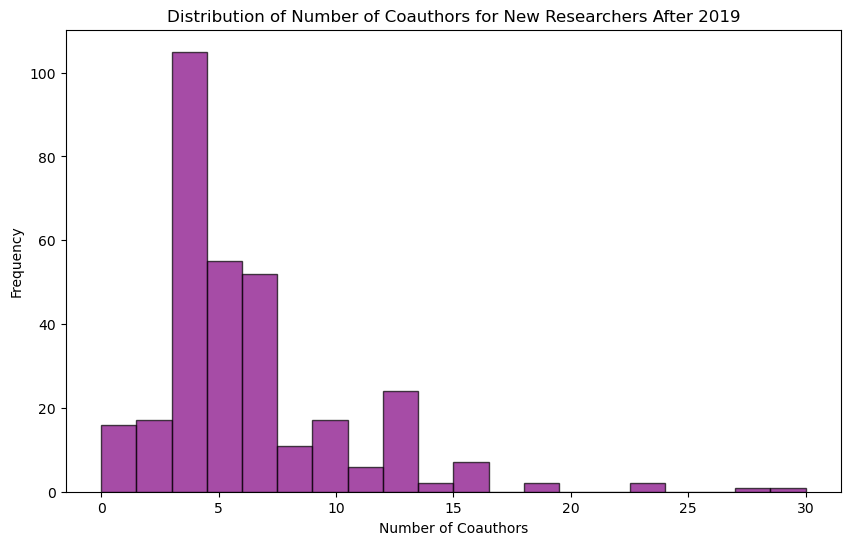

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(young_researchers['num_coauthors'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Coauthors')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Coauthors for New Researchers After 2019')
plt.show()

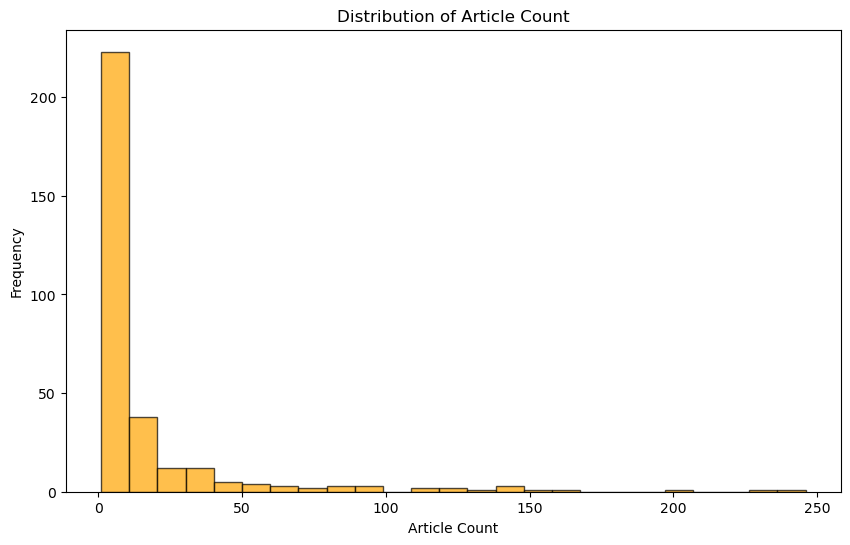

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(young_researchers['article_count'], bins=25, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Article Count')
plt.ylabel('Frequency')
plt.title('Distribution of Article Count')
plt.show()

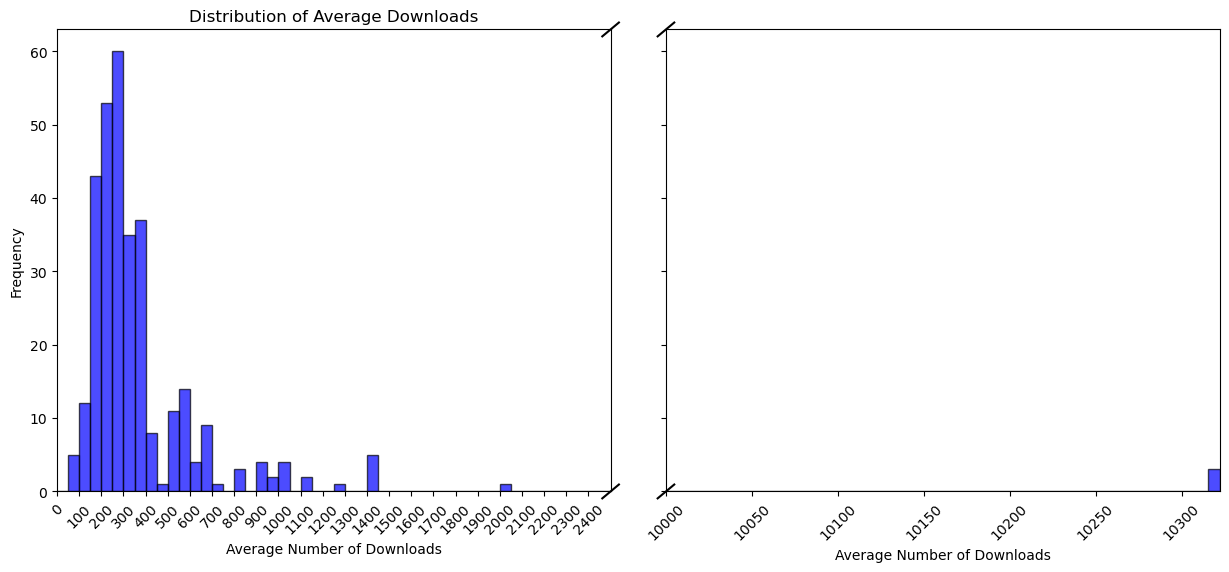

In [15]:
# Create a figure and a set of subplots with broken x-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 6))

ax1.hist(young_researchers['avg_downloads'], bins=50, range=(0, 2500), color='blue', edgecolor='black', alpha=0.7)
ax1.set_xlim(0, 2500)
ax1.set_xlabel('Average Number of Downloads')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Average Downloads')
ax1.set_xticks(np.arange(0, 2500, step=100))
ax1.tick_params(axis='x', rotation=45)

max_downloads = young_researchers['avg_downloads'].max()
ax2.hist(young_researchers['avg_downloads'], bins=50, range=(10000, max_downloads), color='blue', edgecolor='black', alpha=0.7)
ax2.set_xlim(10000, max_downloads)
ax2.set_xlabel('Average Number of Downloads')
ax2.tick_params(axis='x', rotation=45)

# Adjust the plot to show broken axis
fig.subplots_adjust(wspace=0.1)

d = 0.015 
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

plt.show()

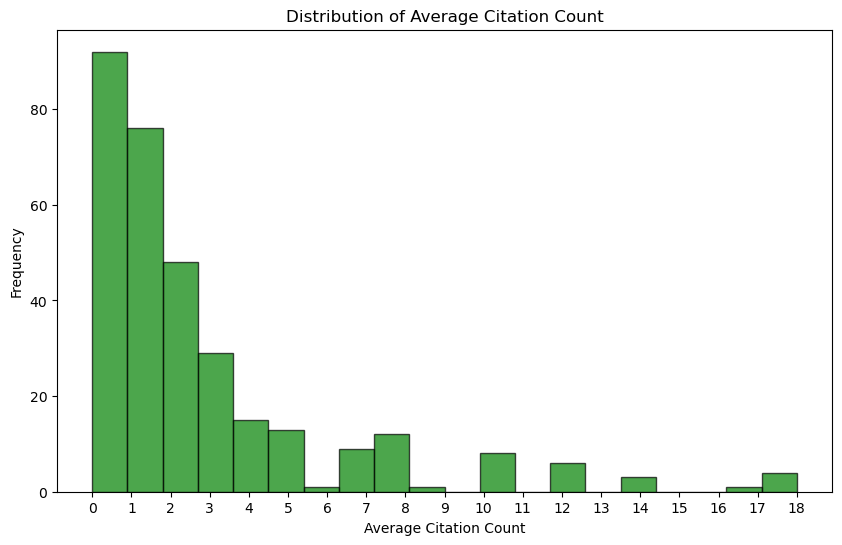

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(young_researchers['avg_citation_count'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Average Citation Count')
plt.ylabel('Frequency')
plt.title('Distribution of Average Citation Count')
plt.xticks(np.arange(0.0, young_researchers['avg_citation_count'].max() + 1, 1))
plt.show()